In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# education = pd.read_csv('education_to2010.csv')
correction = pd.read_csv('corrections_to2010.csv')
crime = pd.read_csv('crime_to2010.csv')

education.reset_index(inplace=True)
correction.reset_index(inplace=True)
crime.reset_index(inplace=True)

In [4]:
df = education.merge(correction,on='State').merge(crime,on='State')
df.head()

,index_x,State,state_abbr,latitude,longitude,edu_2000,edu_2001,edu_2002,edu_2003,edu_2004,...,cri_2001,cri_2002,cri_2003,cri_2004,cri_2005,cri_2006,cri_2007,cri_2008,cri_2009,cri_2010
0,0,Alabama,AL,32.7990,-86.8073,557767814,1205096441,1387975241,1584581070,1672101861,...,192835,200331,201572,201664,197071,200578,204530,211454,198808,186148
1,1,Alaska,AK,61.3850,-152.2683,177881580,227988480,260180178,280079667,299103691,...,26895,27745,28130,26331,28169,28765,27617,24598,24998,24796
2,2,Arizona,AZ,33.7712,-111.3877,667976456,1990909460,2520137525,3103945066,4312713049,...,322549,348467,342973,335699,317823,316286,310394,307979,261511,251978
3,3,Arkansas,AR,34.9513,-92.3809,328403457,618218324,733650835,829601733,888970231,...,111296,112672,111141,124201,127434,127027,127068,123882,123997,118510
4,4,California,CA,36.1700,-119.7462,3792096590,7895473833,9092121808,9928105199,10825485264,...,1346557,1384872,1420637,1425264,1390709,1350137,1299685,1265920,1184073,1146072


In [1]:
X = df[["edu_2001", "cor_2001","cri_2001"]]
y = df["cri_2002"]

print(X.shape, y.shape)

NameError: name 'df' is not defined

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [12]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9983389170229959
Testing Score: 0.9897225080224396


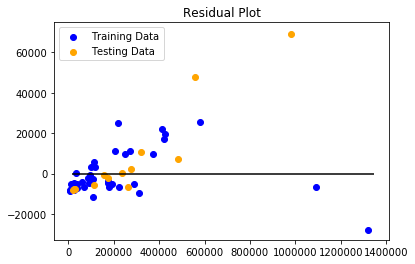

In [27]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [25]:
y_train.shape

(37,)

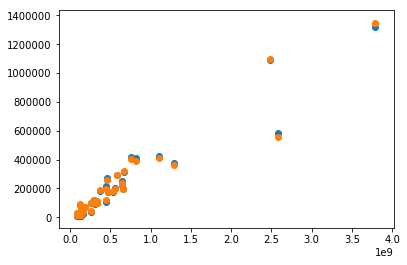

In [26]:
plt.scatter(X_train['edu_2000'], model.predict(X_train))
plt.scatter(X_train['edu_2000'], y_train)